# Задание №3. Аппроксимация функций

## Необходимые предварительные приготовления

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import random

In [2]:
#Умножение матриц
def multMatr(A, B):
    rows_A = len(A)
    cols_A = len(A[0])
    rows_B = len(B)
    cols_B = len(B[0])
    
    if cols_A != rows_B:
        print("Размерности не соответствуют!")
        return
    
    C = [[0 for row in range(cols_B)] for col in range(rows_A)]
    
    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(len(B)):
                C[i][j] += A[i][k] * B[k][j]
    return C

In [3]:
#Перемножение матрицы и вектора
def multMatrVect(A, x):
    ans = []
    for i in range(len(A)):
        temp = 0
        for j in range(len(x)):
            temp+= A[i][j]*x[j]
            
        ans.append(temp)
        
    return ans

In [4]:
#Операция транспонирования
def transMatr(mat):
    res=[]
    n=len(mat)
    m=len(mat[0])
    for j in range(m):
        tmp=[]
        for i in range(n):
            tmp=tmp+[mat[i][j]]
        res=res+[tmp]
    return res

In [5]:
#Реализуем метод Гаусса
def gaussian_elimin(A, b):   
    x_k = []
    a_k = []
   
    for k in range(len(A)):
        A[k].append(b[k])

#--------------------------------------------------------------------------
    #Прямой ход метода Гаусса
    for t in range(len(A)-1):
        num_null = 0
        for i in range(len(A)-t-1):          
            if (A[t][t] == 0) and (A[t+1+i][t] != 0):
                temp = A[t+1+i].copy()
                A[t+1+i] = A[t].copy()
                A[t] = temp
                num_null+=1
                
                if (num_null == len(A)-1-t):
                    break
                    
                continue
            
            elif (A[t][t] == 0) and (A[t+1+i][t] == 0):
                num_null+=1
                    
                if (num_null == len(A)-1-t):
                    print("Ошибка! Определитель равен нулю!")
                    break
                      
                continue
               
            a_k = A[t+1+i][t]
            for j in range(len(A[0])-t):
                A[i+1+t][t+j] -= A[t][t+j]*(a_k/A[t][t]) 
#--------------------------------------------------------------------------
                
    #Обратный ход метода Гаусса
    temp = 0
    for i in range(len(A)):
        x_i = (A[len(A)-1-i][len(A)]-temp)/A[len(A)-1-i][len(A)-1-i] 
        x_k.insert(0, x_i)
        
        temp = 0
        for j in range(len(x_k)):
            temp += x_k[len(x_k)-1-j] * A[len(A)-i-2][len(A)-j-1] 
                                        
    return x_k                   

## МНК (нормальные уравнения)

In [6]:
#Рассматриваемая функция
def func(x):
    f_x = x*np.tan(x)
    return f_x

In [7]:
#Вектор значений рассматриваемой функции
def func_k(x_k):
    func_k = []
    for i in range(0, len(x_k)):
        func_k.append(func(x_k[i]))
        
    return func_k

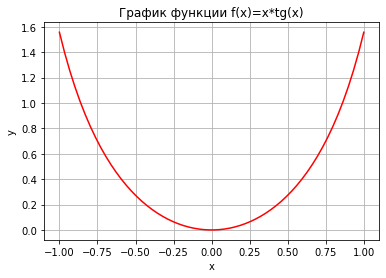

In [8]:
#Рассматриваемый интервал
a = -1
b = 1
m = 60 #Количество рассматриваемых точек
k = 3 #Количество значений в одной точке
n_k = [1, 2, 3, 4, 5] #Степени аппроксимирующих полиномов

#Построение графика функции
x=np.linspace(a, b, m)
plt.grid()
plt.plot(x, func(x), color='red')
plt.title('График функции f(x)=x*tg(x)')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

In [9]:
x_k = []
y_k = []

#Добавляем все точки (с учётом повторений)
for i in range(0, m):
    for j in range(k):
        x_k.append(a+i*(b-a)/(m-1))

#Добавляем все значения в точках (с учётом повторений точек)
for i in range(len(x_k)):
    y_k.append(func(x_k[i]) + random.uniform(-0.5, 0.5))

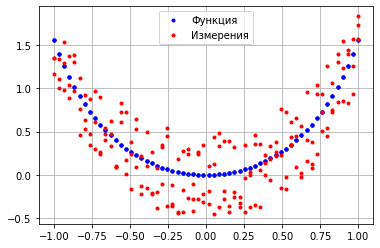

In [10]:
#Построим распределение наших измерений и целевой функции на графике
plt.plot(x_k, func_k(x_k), 'ro', color = 'blue', label = 'Функция', markersize=3)
plt.plot(x_k, y_k, 'ro',  label = 'Измерения', markersize=3)
plt.legend(loc='best')
plt.grid()
plt.show()

In [11]:
#Вычисление интерполяционного полинома в точке
def p_n(x, a_k):
    p = 0
    for i in range(n+1):
        p+=a_k[i]*x**i
    return p

In [12]:
#Вектор значений интерполяционного полинома на точках x_k 
def p_k(n, x_k, a_k):
    p_k = []
    for i in range(len(x_k)):
        p_k.append(p_n(x_k[i], a_k))
    return p_k

In [13]:
#Нахождение суммы квадратов ошибок для МНК (нормальные уравнения)
def least_sq(x_k, a_k):
    ans = 0   
    for i in range(len(x_k)):
        ans+=(p_n(x_k[i], a_k) - func(x_k[i]))**2 
    return ans

In [14]:
#Построение матрицы Вандермонда
def vand_matr(x_k, n):
    E = []
    for i in range(len(x_k)):
        E.append([])
        for j in range(n+1):
            E[i].append(x_k[i]**j)          
    return E

[0.44737933416426856, 2.8296377506322383e-16]


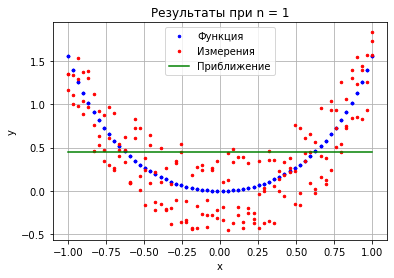

[-0.05351319551392043, 2.0337083791529633e-16, 1.4534094713613033]


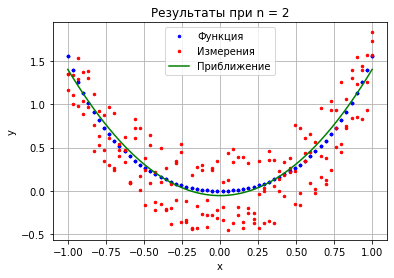

[-0.05351319551392043, 1.1091217684354425e-15, 1.4534094713613033, -1.460631422746514e-15]


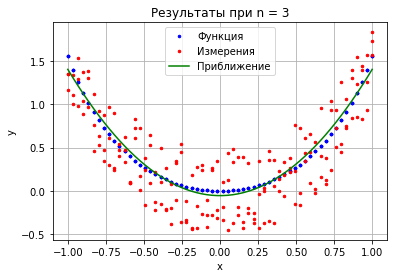

[0.007186009874839764, 1.4889473493362762e-15, 0.8655558454448825, -2.0517676376961868e-15, 0.6639579726849677]


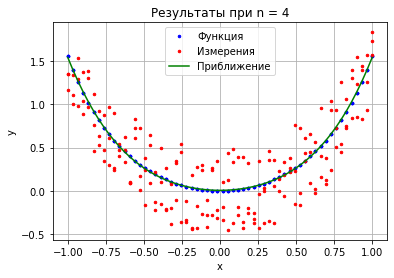

[0.007186009874839764, -5.531085278437286e-16, 0.8655558454448825, 7.184222313307608e-15, 0.6639579726849677, -8.053279409267823e-15]


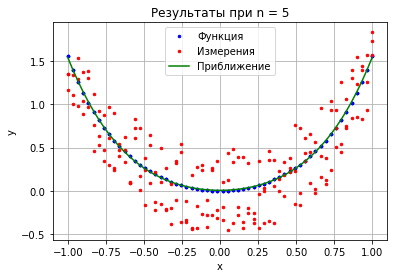

In [15]:
#Построим графики интерполяционного полинома для различных n
for n in n_k:
    E = vand_matr(x_k, n)
    a_k = gaussian_elimin(multMatr(transMatr(E), E), multMatrVect(transMatr(E), func_k(x_k)))
    print(a_k)
    plt.title('Результаты при n = {0}'.format(n))
    plt.ylabel('y')
    plt.xlabel('x')
    plt.plot(x_k, func_k(x_k), 'ro', color = 'blue', label = 'Функция', markersize=2.5)
    plt.plot(x_k, y_k, 'ro',  label = 'Измерения', markersize=2.5)
    plt.plot(x_k, p_k(n, x_k, a_k), color = 'green', label = 'Приближение')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

## МНК (ортогональные многочлены)

In [16]:
#Нахождение alpha из формулы для q(x)
def alpha(i, x_k, alpha_k, beta_k):
    if i == 1:
        return sum(x_k)/len(x_k)
    
    a1 = 0
    a2 = 0
    for j in range(len(x_k)):
        a1 += x_k[j]*q_i(i-1, x_k[j], x_k, alpha_k, beta_k)**2
        a2 += q_i(i-1, x_k[j], x_k, alpha_k, beta_k)**2
    return a1/a2


#Нахождение beta из формулы для q(x)
def beta(i, x_k, alpha_k, beta_k):
    if i == 1:
        ans = 0
        for j in range(len(x_k)):
            ans += x_k[j]*q_i(i, x_k[j], x_k, alpha_k, beta_k)
        return ans/len(x_k)
    
    b1 = 0
    b2 = 0
    for j in range(len(x_k)):
        b1 += x_k[j]*q_i(i, x_k[j], x_k, alpha_k, beta_k)*q_i(i-1, x_k[j], x_k, alpha_k, beta_k)
        b2 += q_i(i-1, x_k[j], x_k, alpha_k, beta_k)**2
    return b1/b2    
    

#Нахождение q_i(x) из формулы
def q_i(i, x, x_k, alpha_k, beta_k):
    if i < len(alpha_k):  
        if i == 0:
            return 1
        if i == 1:
            return x - alpha_k[1]
    
        ans = x*q_i(i-1, x, x_k, alpha_k, beta_k) - alpha_k[i]*q_i(i-1, x, x_k, alpha_k, beta_k) - beta_k[i-1]*q_i(i-2, x, x_k, alpha_k, beta_k)      
        return ans
        
    else:
        alpha_k.append(alpha(i, x_k, alpha_k, beta_k))
        beta_k.append(beta(i-1, x_k, alpha_k, beta_k))
        ans = x*q_i(i-1, x, x_k, alpha_k, beta_k) - alpha_k[i]*q_i(i-1, x, x_k, alpha_k, beta_k) - beta_k[i-1]*q_i(i-2, x, x_k, alpha_k, beta_k)    
        return ans


#Нахождение коэффициентов ортогонального полинома
def ort_pols(n, x_k, y_k):
    a_k2 = []
    alpha_k = [0, sum(x_k)/len(x_k)]
    beta_k = [0]
    for i in range(n+1):
        ans1 = 0 
        ans2 = 0
        for j in range(len(x_k)):
            ans1 += q_i(i, x_k[j], x_k, alpha_k, beta_k)*y_k[j] 
            ans2 += q_i(i, x_k[j], x_k, alpha_k, beta_k)**2 
            
        a_k2.append(ans1/ans2)

    print(a_k2)

    return a_k2


In [17]:
#Значение интерполяционного полинома в точке x
def q(n, x, x_k, a_k):
    q = 0
    alpha_k = [0, sum(x_k)/len(x_k)]
    beta_k = [0]
    
    for i in range(n+1):
        q+=a_k[i]*q_i(i, x, x_k, alpha_k, beta_k)
    return q  

#Нахождение суммы квадратов ошибок для МНК (ортогональные уравнения)
def least_sq2(n, x_k, a_k):
    ans = 0   
    for i in range(len(x_k)):
        ans+=(q(n, x_k[i], x_k, a_k) - func(x_k[i]))**2
        
    return ans

#Значение интерполяционного полинома в точках x_k
def q_k(n, x_k, a_k):
    q_k = []
    for i in range(len(x_k)):
        q_k.append(q(n, x_k[i], x_k, a_k))
        
    return q_k

[0.3876685848888778, 0.026683021708552367]


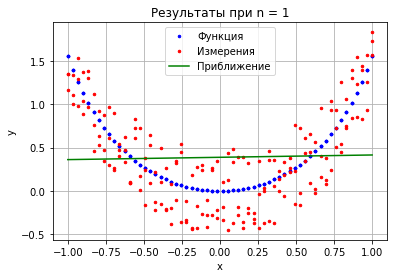

[0.3876685848888778, 0.026683021708552367, 1.4905252202767711]


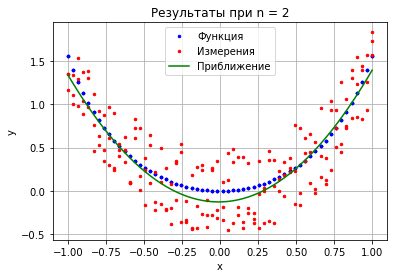

[0.3876685848888778, 0.026683021708552367, 1.4905252202767711, 0.15530398886470376]


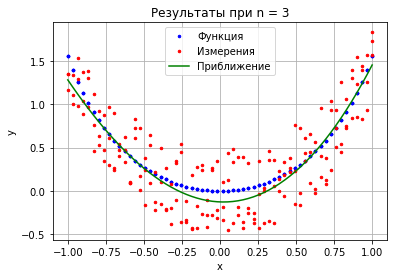

[0.3876685848888778, 0.026683021708552367, 1.4905252202767711, 0.15530398886470376, 0.4932744357555793]


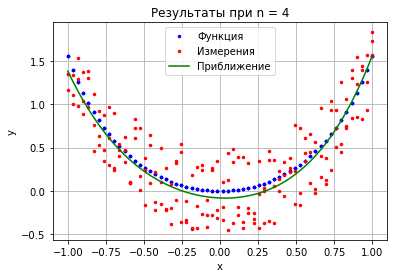

[0.3876685848888778, 0.026683021708552367, 1.4905252202767711, 0.15530398886470376, 0.4932744357555793, 0.472328899403036]


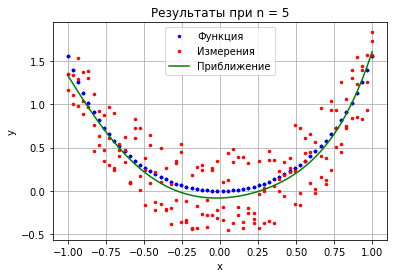

In [18]:
#Построим графики интерполяционного полинома для различных n
for n in n_k:
    a_k3 = ort_pols(n, x_k, y_k)

    plt.title('Результаты при n = {0}'.format(n))
    plt.ylabel('y')
    plt.xlabel('x')
    plt.plot(x_k, func_k(x_k), 'ro', color = 'blue', label = 'Функция', markersize=2.5)
    plt.plot(x_k, y_k, 'ro',  label = 'Измерения', markersize=2.5)
    plt.plot(x_k, q_k(n, x_k, a_k3), color = 'green', label = 'Приближение')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

In [19]:
#Таблица результатов отклонений для различных значений n
table = pd.DataFrame(columns=('n', 'Ошибка для нормальных уравнений', 'Ошибка для ортогональных полиномов'))
for n in n_k:
    E = vand_matr(x_k, n)    
    a_k = gaussian_elimin(multMatr(transMatr(E), E), multMatrVect(transMatr(E), func_k(x_k)))
    a_k3 = ort_pols(n, x_k, y_k)
    new_row = {'n': n, 'Ошибка для нормальных уравнений': least_sq(x_k, a_k), 'Ошибка для ортогональных полиномов': least_sq2(n, x_k, a_k3)}
    table = table.append(new_row, ignore_index = True) 
table

[0.3876685848888778, 0.026683021708552367]
[0.3876685848888778, 0.026683021708552367, 1.4905252202767711]
[0.3876685848888778, 0.026683021708552367, 1.4905252202767711, 0.15530398886470376]
[0.3876685848888778, 0.026683021708552367, 1.4905252202767711, 0.15530398886470376, 0.4932744357555793]
[0.3876685848888778, 0.026683021708552367, 1.4905252202767711, 0.15530398886470376, 0.4932744357555793, 0.472328899403036]


,n,Ошибка для нормальных уравнений,Ошибка для ортогональных полиномов
0,1.0,36.630584,37.316518
1,2.0,0.532060,1.241536
2,3.0,0.532060,1.350872
3,4.0,0.009515,0.862859
4,5.0,0.009515,0.931441
